# Waffle charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [2]:
df = pd.DataFrame({
    'student_type': ['Excellent', 'Very Good', 'Good', 'Average'],
    'number_per_type': [7, 18, 20, 15]
})
df

,student_type,number_per_type
0,Excellent,7
1,Very Good,18
2,Good,20
3,Average,15


c:\program files\python36\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


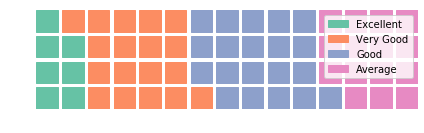

In [3]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=df.shape[0],
    values=df.number_per_type,
    labels=list(df.student_type)
)

Text(0.5, 1.0, 'End-of-year student rankings')

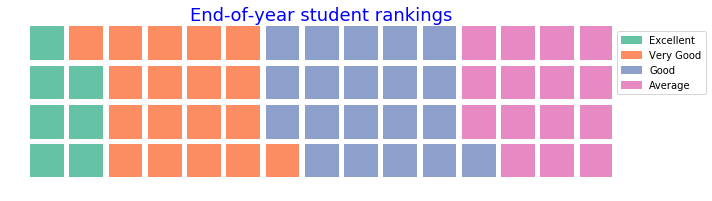

In [29]:
# legend, figsize
fig = plt.figure(
    FigureClass=Waffle, 
    rows=df.shape[0],
    values=df.number_per_type,
    labels=list(df.student_type),
    figsize=(10, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)
    }
)
plt.title("End-of-year student rankings", fontsize=18, color = 'b')

# Tree map

In [5]:
import squarify 

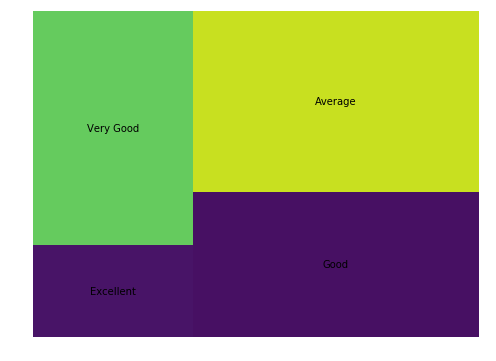

In [32]:
# with 2 lists
plt.figure(figsize=(8,6))
squarify.plot(sizes=[7,18,20,25], label=['Excellent', 'Very Good', 'Good', 'Average'])
plt.axis('off')
plt.show()

In [7]:
df

,student_type,number_per_type
0,Excellent,7
1,Very Good,18
2,Good,20
3,Average,15


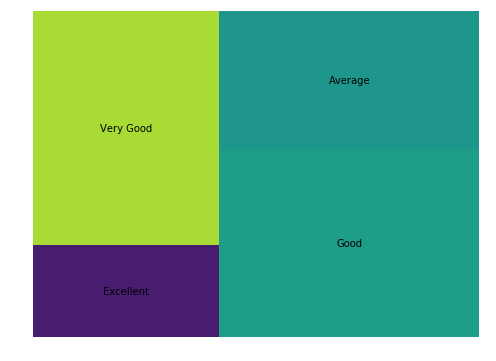

In [8]:
# with dataframe
plt.figure(figsize=(8,6))
squarify.plot(sizes=df['number_per_type'], label=df['student_type'])
plt.axis('off')
plt.show()

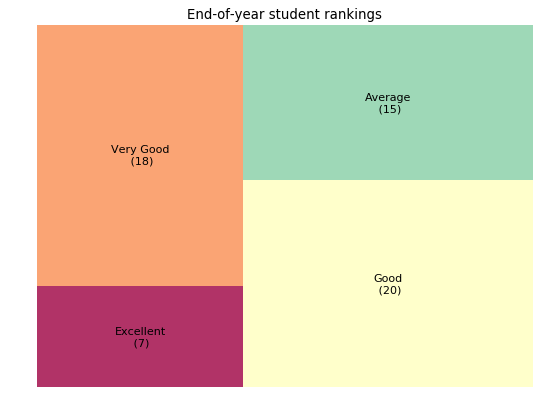

In [9]:
# create data
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['number_per_type'].values
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('End-of-year student rankings')
plt.axis('off')
plt.show()

In [10]:
# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [11]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [42]:
# Prepare Data
df1 = df_raw.groupby('class').size().reset_index(name='counts')
print(df1)

        class  counts
0     2seater       5
1     compact      47
2     midsize      41
3     minivan      11
4      pickup      33
5  subcompact      35
6         suv      62


In [ ]:
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
print(labels)
print(sizes)
print(colors)

In [13]:
df1.head()

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33


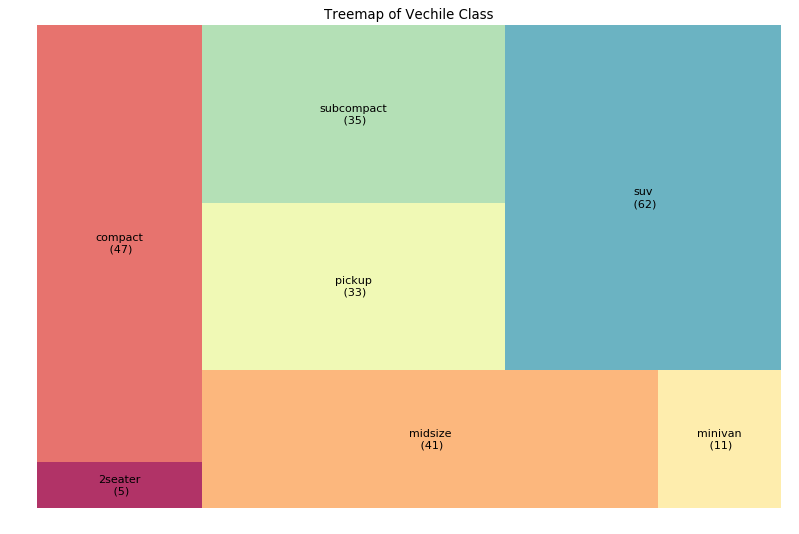

In [14]:
# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

# Word clouds

#### Word clouds (còn được gọi là text clouds hay tag clouds) được tạo ra theo cách đơn giản như sau: càng nhiều từ cụ thể xuất hiện trong nguồn dữ liệu văn bản (như bài phát biểu - speech, bài đăng trên blog - blog post, hoặc cơ sở dữ liệu), thì nó càng lớn và trọng tâm hơn khi thể hiện trong word clouds.
#### Nó hiển thị một danh sách các từ, tầm quan trọng của mỗi từ được hiển thị với kích thước phông chữ hoặc màu sắc. Định dạng này hữu ích để nhanh chóng nhận thức các thuật ngữ nổi bật nhất.

In [15]:
# cài đặt: pip install wordcloud
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [16]:
# https://amueller.github.io/word_cloud/

In [17]:
text = '''Begin your journey into Data Science! \
Even if you've never written a line of code in your life, \
you'll be able to follow this course and witness the power \
of Python to perform Data Science. You'll use data to solve the mystery of Bayes,\ 
the kidnapped Golden Retriever, \
and along the way you'll become familiar with basic Python syntax \
and popular Data Science modules like Matplotlib (for charts and graphs) \ 
and Pandas (for tabular data).'''

In [18]:
stopwords = set(STOPWORDS)

In [19]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='black',
    max_words=1000,
    stopwords=stopwords
)

# generate the word cloud
wc.generate(text)

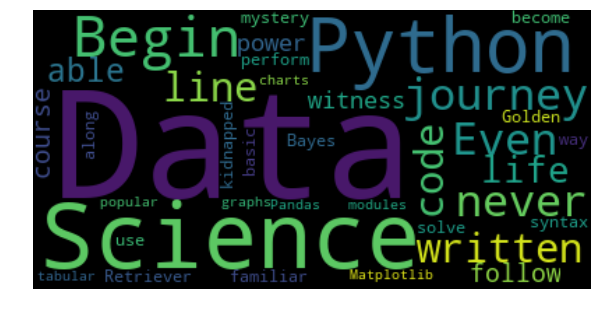

In [20]:
# display the word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

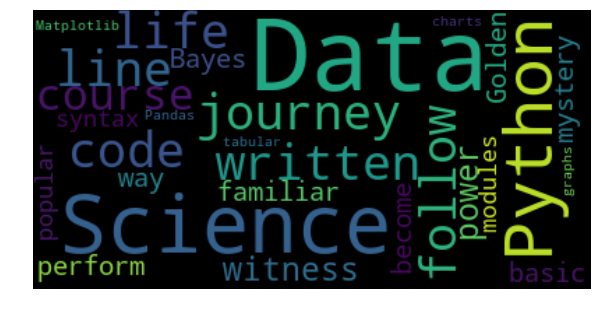

In [21]:
list_of_words = ['solve', 'Retriever', 'Begin', 'along', 'able', 'use', 'kidnapped', 'never', 'Even']
for word in list_of_words:
    stopwords.add(word) # add the less important word to stopwords 
# re-generate the word cloud
wc.generate(text)
# display the cloud
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
import numpy as np
from PIL import Image

In [23]:
# save mask to wc_mask
wc_mask = np.array(Image.open('heart.png'))

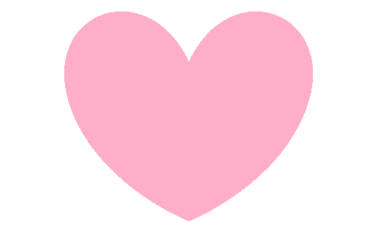

In [24]:
plt.imshow(wc_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

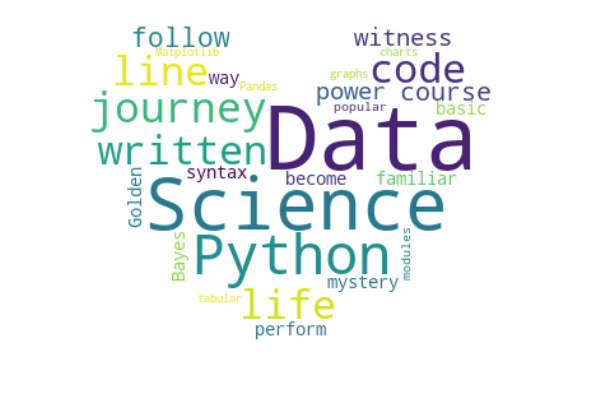

In [25]:
# instantiate a word cloud object
wc1 = WordCloud(background_color='white', max_words=1000, mask=wc_mask, stopwords=stopwords)
# generate the word cloud
wc1.generate(text)
# display the word cloud
plt.figure(figsize=(10, 12))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Get new color from here: http://hslpicker.com/#bb161b
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(131,79%%, %d%%)" % np.random.randint(49,51))

#create the wordcloud object
wordcloud = WordCloud(background_color='black',max_font_size = 50, stopwords=stopwords).generate(text)

#change the color setting
wordcloud.recolor(color_func = grey_color_func)

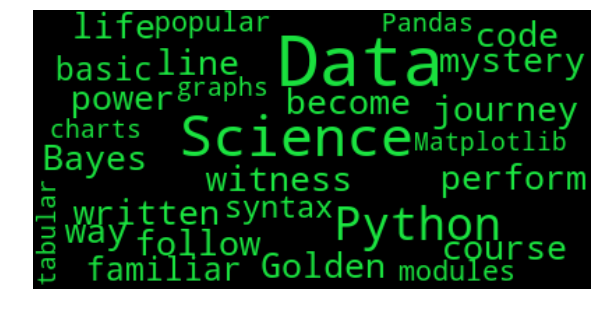

In [27]:
# display the word cloud
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()